# CM50266 Applied Data Science Lab 1: Weather Visualisation


We have four csv files that we need to bring into this project to analyse. These are all related to weather data in the year of 2017 from readings such as temperature, humidity to such data like the barometer readings. Our job is to make sense of this data by gaining some key statistics and tyo also present the data in a clever way in order to gauge some conclusions.


# Task 1 

## Part 1 --- Create a Function to takes in a csv file, and we want to output this data in a suitable data structure. 

Write a python program to parse the CSV files. Read the data from the CSV files into an appropriate python data structure. For the file handling part of this task you should NOT use an existing CSV reading and parsing library such as PANDAS. Instead you should code the capability from scratch. You are recommended to structure your code to allow re-use of the core parser as you may find it useful in the future. You may use libraries including PANDAS once you have read the data.


In [1]:
'''Create a CSV reader to read the given csv files! We want to output the data from the files
in a suitable data structure. Plus we don't want to use any built in python libraries to do this!'''

def Read_my_Csv(filename) :

    with open(filename, 'r') as f :

        result = []

        
        for row in f :
            new_row = row.split(',')
        
            #Want to check for empty data fields
            if new_row == ' ' :
                result.append(new_row('NaN'))
            
            #Want to check the number of data fields in each row
            elif len(new_row) < row.count(',') + 1 :
                sys.exit('Not enough Data')
                
            elif '!@£$%^&*' in new_row :
                sys.exit('Illegal character found')
            
        #Lots of extra characers we ave remove like \n and \"
            new_row = [i.replace('\ufeff','') for i in new_row]
            new_row = [i.replace('\n', '') for i in new_row]
            new_row = [i.replace('\"', '') for i in new_row]
            new_row = [i.replace(' 00:00:00', '') for i in new_row]
        
        #Need to do something to check for headings or titles
        #Lets check through the first line of the csv file
        
            for i in new_row[0] :
                if type(i) != str :
                    sys.exit('No Header')
        
            
            result.append(new_row)

    return result
#     We output our csv file as a list of lists

In [43]:
print(Read_my_Csv('broken.csv'))

[['DateTime', 'Humidity', 'Temperature', 'Temperature_range (low)', 'Temperature_range (high)'], ['2016-10-09', '54', '21.93', '', '22.8'], ['2016-10-10', '52', '21.77', '20.4', '23.6'], ['2016-10-11', '51', '21.36', '19.9', '23'], ['2016-10-12', '51', '21.44', '20', '23.6'], ['2016-10-13', '52', '21.22', '20.1', '22.3'], ['2016-10-14', '52', '21.02', '19.6', '22.6'], ['2016-10-15', '53', '21.4', '20.3', '22.5'], ['2016-10-16', '53', '21.43', '20', '23'], ['2016-10-17', '53', '21.67', '20.5', '22.7'], ['2016-10-18', '54', '21.75', '20.6', '23.1'], ['2016-10-19', '53', '21.22', '20.2', '22.7'], ['2016-10-20', '52', '21.25', '20.2', '22.8'], ['2016-10-21', '50', '21.09', '19.4', '23.1'], ['2016-10-22', '49', '20.86', '19.5', '22.5'], ['2016-10-23', '49', '20.51', '19', '22.2'], ['2016-10-24', '49', '20.38', '19.1', '22.3'], ['2016-10-25', '50', '20.8', '19.7', '22.3'], ['2016-10-26', '50', '21.14', '20', '22.8'], ['2016-10-27', '50', '21.15', '20.1', '22.5'], ['2016-10-28', '51', '21.57'

## Part 2 --- For each of our csv files, we need to calculate some key statistics for these data. The reason for doing this to start getting a picture of what this data is telling us, and to start to form some opinions on what sort of hypothesis' we can draw from the data.

Compute the minimum, maximum, mean and standard deviation for each component of the weather data and report this. In task 2 you may wish to account for gaps or other issues in the data provided, but in task 1 you should compute these values for all the data provided.

In [3]:
'''Want to now compute the minimum, maximum, median, meand and standard deviation for our data. 
To do this I am going to import pandas to put our list of lists into a panda dataframe. 
Not only will it make our data nicer to look at. But will make it easier to calculate these statistics'''

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns


In [4]:
'''I want to create a function that deals with our date format
 and also uses pandas to output our data frame with key statistics on it'''

def dataframe(data) :
    
    column_headings = data[0]
    data.pop(0)
    df = pd.DataFrame(data, columns = column_headings, dtype= float)
    df.DateTime = pd.to_datetime(df.DateTime)
    
    return df

# a = Read_my_Csv('indoor-temperature-last-year.csv')


In [5]:
''' I also want to create a function to deal with splitting my dataframe up
to consider how our data is represented depending on the sease
input- row
output - classify each row into a season'''


def get_season(row):
    if row['DateTime'].month >= 3 and row['DateTime'].month <= 5:
        return 'Spring'
    elif row['DateTime'].month >= 6 and row['DateTime'].month <= 8:
        return 'Summer'
    elif row['DateTime'].month >= 9 and row['DateTime'].month <= 11:
        return 'Autumn'
    else:
        return 'Winter'
    

## Barometer  
### In this section we will be exploring the Barometer csv file and see what we can get out of it.

Lets understand what Barometer means,

A barometer is a scientific instrument that is used to measure air pressure in a certain environment. Pressure tendency can forecast short term changes in the weather. Many measurements of air pressure are used within surface weather analysis to help find surface troughs, pressure systems and frontal boundaries.

Barometers and pressure altimeters (the most basic and common type of altimeter) are essentially the same instrument, but used for different purposes. An altimeter is intended to be used at different levels matching the corresponding atmospheric pressure to the altitude, while a barometer is kept at the same level and measures subtle pressure changes caused by weather and elements of weather. The average atmospheric pressure on the earth's surface varies between 940 and 1040 hPa (mbar). The average atmospheric pressure at sea level is 1013 hPa (mbar).

In [6]:
Baro_Data = Read_my_Csv('barometer-last-year.csv') 
#For this data the pressure is measure in milli bar. 
#Want to convert it to bar
Baro_df = dataframe(Baro_Data)
Baro_df.Baro = Baro_df.Baro * 0.001
Baro_df['Month'] = Baro_df['DateTime'].dt.to_period('M')
Baro_df['Season'] = Baro_df.apply(get_season, axis=1)


Baro_df

,DateTime,Baro,Month,Season
0,2016-10-09,1.0219,2016-10,Autumn
1,2016-10-10,1.0199,2016-10,Autumn
2,2016-10-11,1.0158,2016-10,Autumn
3,2016-10-12,1.0132,2016-10,Autumn
4,2016-10-13,1.0059,2016-10,Autumn
...,...,...,...,...
350,2017-10-05,1.0106,2017-10,Autumn
351,2017-10-06,1.0192,2017-10,Autumn
352,2017-10-07,1.0115,2017-10,Autumn
353,2017-10-08,1.0131,2017-10,Autumn


In [7]:
Baro_df.describe()

,Baro
count,355.000000
mean,1.009999
std,0.009870
min,0.979600
25%,1.004850
50%,1.010500
75%,1.016050
max,1.035600


# Indoor Temperature Analysis

Our Data is given in the format of recording over a period of time, the humidity, temperature, lowest tempertaure, highest temperature and the given temperature ranges over the course of the day.

In [8]:
# Get out our list of lists for our Indoor Temperature csv file
Indoor_Temp = Read_my_Csv('indoor-temperature-last-year.csv')
# print(Indoor_Temp) # Check it has loaded properly
Indoor_Temp_df = dataframe(Indoor_Temp)
Indoor_Temp_df['Month'] = Indoor_Temp_df['DateTime'].dt.to_period('M')
Indoor_Temp_df['Season'] = Indoor_Temp_df.apply(get_season, axis=1)
# Indoor_Temp_df



In [9]:
Indoor_Temp_df.describe()

,Humidity,Temperature,Temperature_range (low),Temperature_range (high)
count,354.000000,354.000000,354.000000,354.000000
mean,48.519774,21.827885,20.555932,23.533616
std,5.188886,2.058307,2.405125,1.701466
min,37.000000,18.040000,14.900000,19.700000
25%,44.000000,20.345000,18.725000,22.500000
50%,48.000000,21.710000,20.600000,23.200000
75%,52.000000,22.710000,21.900000,24.100000
max,59.000000,29.210000,28.200000,31.100000


# Outside Temperature Analysis

We will do a similar thing as we did for the indoor temperature but for the outdoor temperature!!

In [10]:
# Get out our list of lists for our Outdoor Temperature csv file
Outside_Temp = Read_my_Csv('outside-temperature-last-year.csv')

Outside_Temp_df = dataframe(Outside_Temp)
Outside_Temp_df['Month'] = Outside_Temp_df['DateTime'].dt.to_period('M')
Outside_Temp_df['Season'] = Outside_Temp_df.apply(get_season, axis=1)
# print(Outdoor_Temp) # Check it has loaded properly


Outside_Temp_df


,DateTime,Temperature,Temperature_range (low),Temperature_range (high),Month,Season
0,2016-10-09,10.66000,7.2,13.8,2016-10,Autumn
1,2016-10-10,8.94000,5.6,12.8,2016-10,Autumn
2,2016-10-11,8.69000,5.3,14.3,2016-10,Autumn
3,2016-10-12,11.55000,9.0,14.9,2016-10,Autumn
4,2016-10-13,9.40000,6.0,13.3,2016-10,Autumn
...,...,...,...,...,...,...
350,2017-10-05,13.32000,10.0,17.2,2017-10,Autumn
351,2017-10-06,11.58000,7.2,17.6,2017-10,Autumn
352,2017-10-07,13.70000,11.7,16.4,2017-10,Autumn
353,2017-10-08,13.60000,9.6,21.7,2017-10,Autumn


In [11]:
Outside_Temp_df.describe()

,Temperature,Temperature_range (low),Temperature_range (high)
count,355.000000,355.000000,355.000000
mean,11.138877,7.865634,15.524225
std,5.355042,4.878930,7.034445
min,-1.810000,-4.100000,1.500000
25%,7.390000,4.350000,10.250000
50%,10.960000,8.000000,15.100000
75%,15.050000,12.050000,19.850000
max,26.380000,18.700000,38.500000


# Rainfall Analysis


In [12]:
Rainfall = Read_my_Csv('rainfall-last-year.csv')
Rainfall_df = dataframe(Rainfall)
Rainfall_df['Month'] = Rainfall_df['DateTime'].dt.to_period('M')
Rainfall_df['Season'] = Rainfall_df.apply(get_season, axis=1)
# Rainfall_df

In [13]:
Rainfall_df.describe()

,mm
count,353.000000
mean,1.548725
std,3.324599
min,0.000000
25%,0.000000
50%,0.000000
75%,1.100000
max,23.200000


# One Big DataFrame to describe all the data

In [14]:
Big_Weather1 = pd.merge(Rainfall_df,Outside_Temp_df, on='DateTime')
Big_Weather2 = pd.merge(Baro_df,Indoor_Temp_df, on='DateTime')
Big_Weather = pd.merge(Big_Weather2,Big_Weather1, on='DateTime')


Big_Weather = Big_Weather.drop(['Month_y_x','Season_y_x','Month_x_y','Season_x_y','Month_y_y','Season_y_y'],axis=1)
Big_Weather = Big_Weather.rename(columns = {'Month_x_x' : 'Month'})
Big_Weather = Big_Weather.rename(columns = {'Season_x_x' : 'Season'})
Big_Weather = Big_Weather.rename(columns = {'Temperature_range (low)_x' : 'Indoor Temp Range (min)'})
Big_Weather = Big_Weather.rename(columns = {'Temperature_x' : 'Indoor Temp (Celcius)'})
Big_Weather = Big_Weather.rename(columns = {'Temperature_range (high)_x' : 'Indoor Temp Range (max)'})
Big_Weather = Big_Weather.rename(columns = {'Temperature_range (low)_y' : 'Outside Temp Range (min)'})
Big_Weather = Big_Weather.rename(columns = {'Temperature_range (high)_y' : 'Outside Temp Range (max)'})
Big_Weather = Big_Weather.rename(columns = {'Temperature_y' : 'Outside Temp (Celcius)'})
Big_Weather = Big_Weather.rename(columns = {'mm' : 'Rainfall (mm)'})

Big_Weather 


# sns.pairplot(Big_Weather)


,DateTime,Baro,Month,Season,Humidity,Indoor Temp (Celcius),Indoor Temp Range (min),Indoor Temp Range (max),Rainfall (mm),Outside Temp (Celcius),Outside Temp Range (min),Outside Temp Range (max)
0,2016-10-09,1.0219,2016-10,Autumn,54.0,21.93000,21.0,22.8,0.0,10.66000,7.2,13.8
1,2016-10-10,1.0199,2016-10,Autumn,52.0,21.77000,20.4,23.6,0.0,8.94000,5.6,12.8
2,2016-10-11,1.0158,2016-10,Autumn,51.0,21.36000,19.9,23.0,0.0,8.69000,5.3,14.3
3,2016-10-12,1.0132,2016-10,Autumn,51.0,21.44000,20.0,23.6,0.0,11.55000,9.0,14.9
4,2016-10-13,1.0059,2016-10,Autumn,52.0,21.22000,20.1,22.3,0.0,9.40000,6.0,13.3
...,...,...,...,...,...,...,...,...,...,...,...,...
347,2017-10-05,1.0106,2017-10,Autumn,56.0,21.34000,20.6,22.8,1.0,13.32000,10.0,17.2
348,2017-10-06,1.0192,2017-10,Autumn,54.0,21.34000,20.3,22.3,0.0,11.58000,7.2,17.6
349,2017-10-07,1.0115,2017-10,Autumn,55.0,21.34000,20.6,21.9,1.1,13.70000,11.7,16.4
350,2017-10-08,1.0131,2017-10,Autumn,55.0,21.81000,20.6,23.5,0.0,13.60000,9.6,21.7


In [15]:
Big_Weather.describe()


,Baro,Humidity,Indoor Temp (Celcius),Indoor Temp Range (min),Indoor Temp Range (max),Rainfall (mm),Outside Temp (Celcius),Outside Temp Range (min),Outside Temp Range (max)
count,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000
mean,1.010003,48.525568,21.833271,20.561364,23.540341,1.550284,11.143271,7.870170,15.540341
std,0.009882,5.202939,2.060508,2.406150,1.703246,3.329203,5.363979,4.885509,7.050693
min,0.979600,37.000000,18.040000,14.900000,19.700000,0.000000,-1.810000,-4.100000,1.500000
25%,1.004875,44.000000,20.355000,18.775000,22.500000,0.000000,7.420000,4.375000,10.275000
50%,1.010550,48.000000,21.710000,20.600000,23.200000,0.000000,10.940000,8.000000,15.100000
75%,1.016025,52.000000,22.717500,21.900000,24.125000,1.100000,15.102500,12.100000,19.925000
max,1.035600,59.000000,29.210000,28.200000,31.100000,23.200000,26.380000,18.700000,38.500000


## Part 3 --- Compare variables checking for Correlations


Using either a suitable python library to plot pairs of the data or Microsoft Excel, visually check for correlations between the weather components.

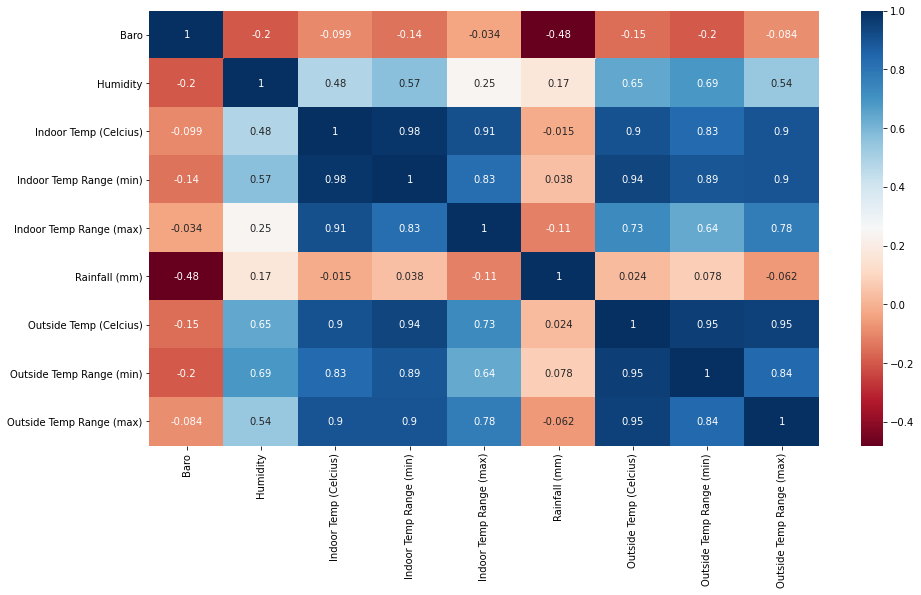

In [16]:
plt.figure(figsize=(15,8))


Weather_Corr = Big_Weather.corr()

sns.heatmap(Weather_Corr, annot=True, cmap='RdBu')



In [17]:
# plt.figure(figsize=(10,5))
# plt.title('Outdoor vs Indoor Temp over the course of a year(2016-2017)')
# plt.plot(Outside_Temp_df['DateTime'], Outside_Temp_df['Temperature'], label = 'Outdoor Temp' )
# plt.plot(Indoor_Temp_df['DateTime'], Indoor_Temp_df['Temperature'], label = 'Indoor Temp')
# plt.plot(Indoor_Temp_df['DateTime'], Indoor_Temp_df['Humidity'], label = 'Humidity')
# plt.plot(Rainfall_df['DateTime'], Rainfall_df['mm'], label = 'Rainfall')


# plt.xticks(Outside_Temp_df.DateTime[::30], rotation = 45)
# plt.legend()
# plt.show()

## Rainfall vs Humidity

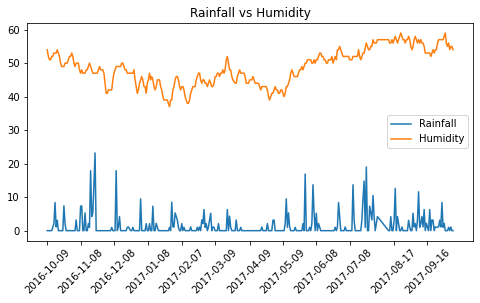

In [18]:
plt.figure(figsize=(8,4))
plt.title('Rainfall vs Humidity')
plt.plot(Rainfall_df['DateTime'], Rainfall_df['mm'], label = 'Rainfall')
plt.plot(Indoor_Temp_df['DateTime'], Indoor_Temp_df['Humidity'], label = 'Humidity')
plt.xticks(Indoor_Temp_df.DateTime[::30], rotation = 45)
plt.legend()
plt.show()

## Rainfall vs Outdoor

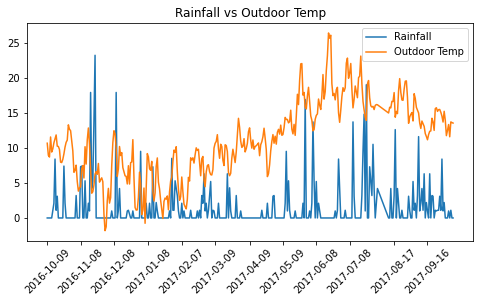

In [19]:
plt.figure(figsize=(8,4))
plt.title('Rainfall vs Outdoor Temp')
plt.plot(Rainfall_df['DateTime'], Rainfall_df['mm'], label = 'Rainfall')
plt.plot(Outside_Temp_df['DateTime'], Outside_Temp_df['Temperature'], label = 'Outdoor Temp' )
plt.xticks(Indoor_Temp_df.DateTime[::30], rotation = 45)
plt.legend()
plt.show()

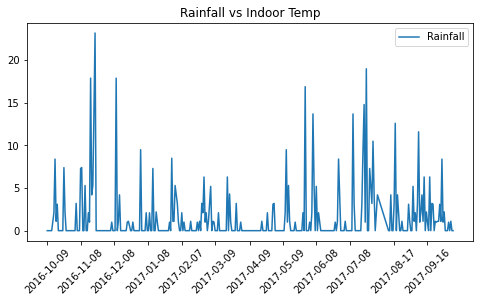

In [20]:
plt.figure(figsize=(8,4))
plt.title('Rainfall vs Indoor Temp')
plt.plot(Rainfall_df['DateTime'], Rainfall_df['mm'], label = 'Rainfall')

plt.xticks(Indoor_Temp_df.DateTime[::30], rotation = 45)
plt.legend()
plt.show()

## Barometer Comparison Graphs

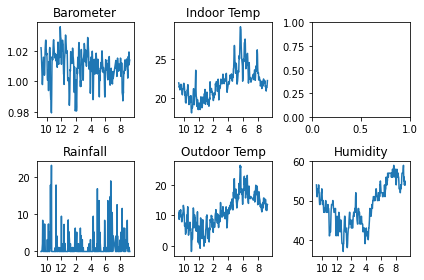

In [21]:
fig, axs = plt.subplots(2, 3)
axs[0, 0].plot(Baro_df['DateTime'], Baro_df['Baro'], label = 'Barometer')
axs[0, 0].set_title("Barometer")
axs[0, 0].set_xticklabels([10,12,2,4,6,8,10])
axs[1, 0].plot(Rainfall_df['DateTime'], Rainfall_df['mm'], label = 'Rainfall')
axs[1, 0].set_title("Rainfall")
axs[1, 0].set_xticklabels([10,12,2,4,6,8,10])
axs[0, 1].plot(Indoor_Temp_df['DateTime'], Indoor_Temp_df['Temperature'], label = 'Indoor Temp')
axs[0, 1].set_title("Indoor Temp")
axs[0, 1].set_xticklabels([10,12,2,4,6,8,10])
axs[1, 1].plot(Outside_Temp_df['DateTime'], Outside_Temp_df['Temperature'], label = 'Outdoor Temp' )
axs[1, 1].set_title("Outdoor Temp")
axs[1, 1].set_xticklabels([10,12,2,4,6,8,10])

axs[1, 2].plot(Indoor_Temp_df['DateTime'], Indoor_Temp_df['Humidity'], label = 'Humidity')
axs[1, 2].set_title("Humidity")
axs[1, 2].set_xticklabels([10,12,2,4,6,8,10])
fig.tight_layout()

# Task 2

## Extend your code to summarise the data into monthly and seasonable values. From this summary data construct two infographics (monthly and seasonal.) These should convey the summarised data for all the weather components concisely and clearly.


## Monthly Data

We want to start to categorise monthly data to try to spot patterns in order to draw relevant conclusions.

### Barometer Monthly

In [22]:
baro_df_mon = Baro_df.groupby(['Month']).agg([np.mean, np.std])
# baro_df_mon


    


## Creating Monthly Graphs to include in our Infographic

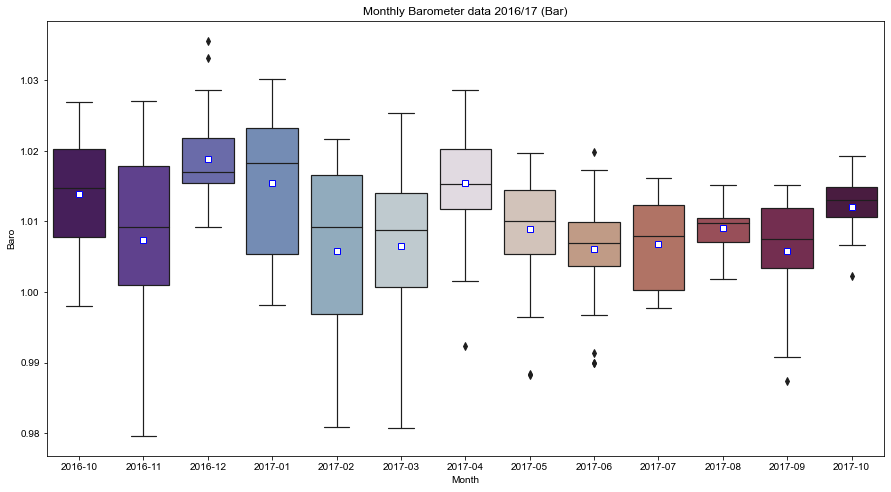

In [23]:
plt.figure(figsize=(15,8))
plt.title('Monthly Barometer data 2016/17 (Bar)')

sns.set_context('paper', font_scale=1.4)
sns.set_style("darkgrid")
sns.boxplot(x='Month', y='Baro', data=Baro_df, palette='twilight_shifted', showmeans=True,meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})



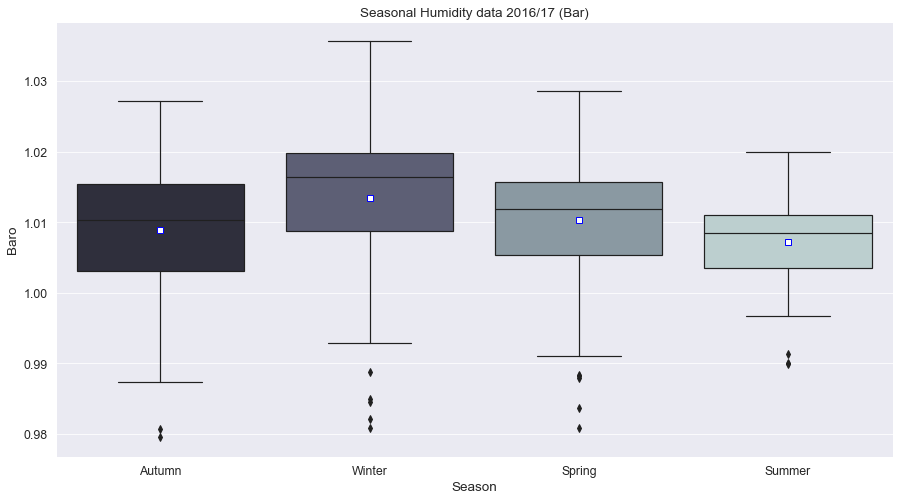

In [24]:
plt.figure(figsize=(15,8))
plt.title('Seasonal Humidity data 2016/17 (Bar)')



sns.boxplot(x='Season', y='Baro', data=Big_Weather, palette='bone', showmeans=True,meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})




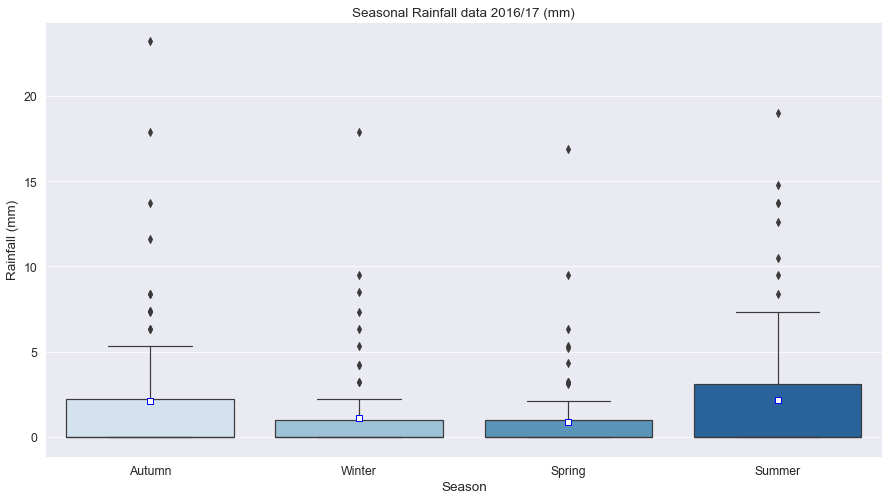

In [25]:
plt.figure(figsize=(15,8))
plt.title('Seasonal Rainfall data 2016/17 (mm)')

sns.boxplot(x='Season', y='Rainfall (mm)', data=Big_Weather, palette='Blues', showmeans=True,meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})



<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

<Figure size 1080x576 with 0 Axes>

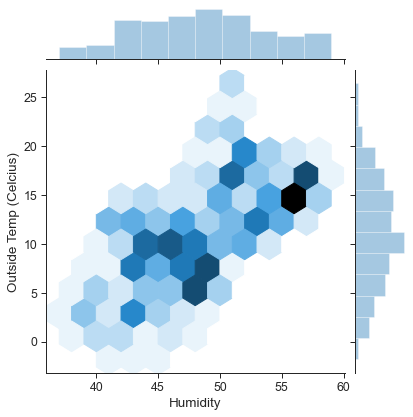

In [26]:


plt.figure(figsize=(15,8))

sns.set_style('ticks')



sns.set_context('paper', font_scale=1.4)

sns.jointplot(x='Humidity', y='Outside Temp (Celcius)', data=Big_Weather, kind='hex')

sns.despine

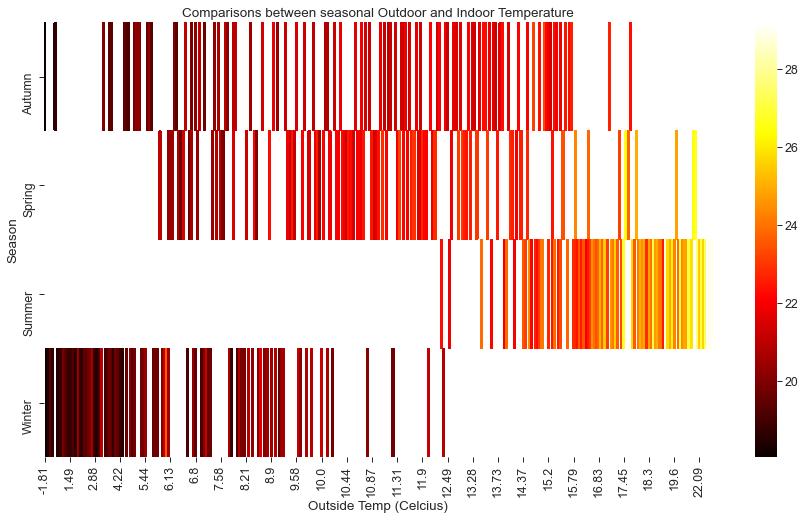

In [27]:
plt.figure(figsize=(15,8))
plt.title('Comparisons between seasonal Outdoor and Indoor Temperature')



Weather = Big_Weather.pivot_table(index='Season', columns='Outside Temp (Celcius)', values='Indoor Temp (Celcius)')
sns.set_style("darkgrid")

ax = sns.heatmap(Weather, cmap='hot')


xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%2==1:
        xticks[i].set_visible(False)

plt.show()




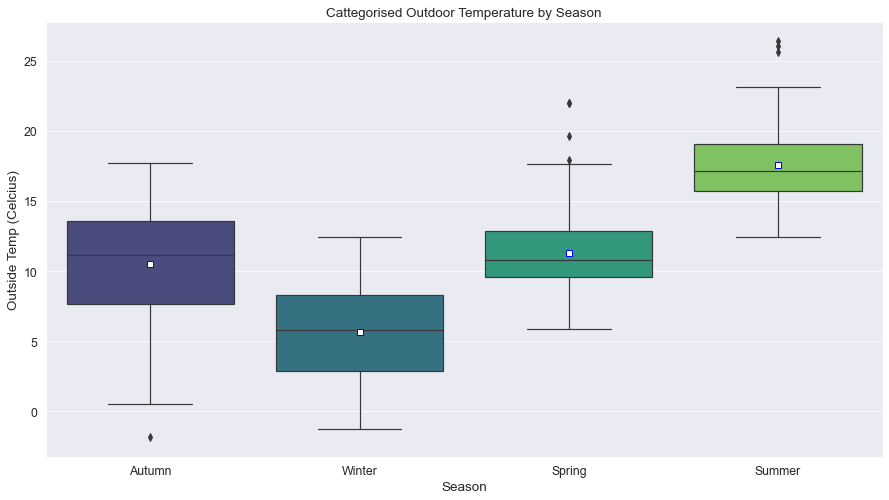

In [28]:
plt.figure(figsize=(15,8))

plt.title('Cattegorised Outdoor Temperature by Season')


sns.boxplot(x='Season', y='Outside Temp (Celcius)', data=Big_Weather, palette='viridis', showmeans=True,meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"})

### Indoor Temp Monthly

In [29]:
indoor_temp_mon = Indoor_Temp_df.groupby(['Month']).agg([np.mean, np.std])
indoor_temp_mon

Humidity           Temperature           Temperature_range (low)  \
              mean       std        mean       std                    mean   
Month                                                                        
2016-10  51.521739  1.562910   21.319565  0.422347               20.126087   
2016-11  48.133333  1.502488   20.121333  0.861501               18.533333   
2016-12  45.866667  3.048271   19.732667  1.164643               18.040000   
2017-01  42.483871  2.779340   19.563226  0.640080               17.532258   
2017-02  43.178571  2.597058   20.252857  0.779648               18.571429   
2017-03  46.266667  2.303421   21.132333  0.784143               19.620000   
2017-04  43.700000  2.151984   22.097667  0.614748               20.733333   
2017-05  45.096774  3.249152   23.202581  1.382343               22.183871   
2017-06  51.533333  1.357821   24.697333  2.210715               23.796667   
2017-07  53.033333  1.731719   24.615000  1.551119               23.820000   
2017-08  57.000000  0.816497   23.488636  1.063383               22.727273   
2017-09  55.166667  1.763291   22.066333  0.500210               21.303333   
2017-10  55.777778  1.715938   21.474583  0.374218               20.811111   

                  Temperature_range (high)            
              std                     mean       std  
Month                                                 
2016-10  0.569064                22.773913  0.368310  
2016-11  1.260906                22.226667  0.461581  
2016-12  1.348716                21.863333  1.036733  
2017-01  0.723135                22.709677  0.810496  
2017-02  0.998835                22.896429  0.484945  
2017-03  1.017909                23.286667  0.549441  
2017-04  0.691492                23.633333  0.563446  
2017-05  1.423165                24.435484  1.438877  
2017-06  2.034442                25.800000  2.516155  
2017-07  1.431517                25.643333  1.790335  
2017-08  0.992439                24.568182  1.361157  
2017-09  0.579229                22.983333  0.747909  
2017-10  0.623387                22.322222  0.542627

### Outdoor Temp Monthly

In [30]:
Outside_temp_mon = Outside_Temp_df.groupby(['Month']).agg([np.mean, np.std])

Outside_temp_mon

Temperature           Temperature_range (low)            \
               mean       std                    mean       std   
Month                                                             
2016-10   10.340870  1.473135                7.739130  2.049998   
2016-11    6.223333  2.949072                3.696667  3.213493   
2016-12    6.218667  3.544159                3.770000  3.865957   
2017-01    4.424839  2.894612                1.780645  3.250479   
2017-02    6.312500  2.856244                4.342857  3.129007   
2017-03    8.982333  2.192136                5.960000  2.714025   
2017-04   10.305667  1.582596                5.986667  2.072269   
2017-05   14.531613  3.033466               10.041935  2.921275   
2017-06   17.601000  3.755262               13.196667  2.454620   
2017-07   18.156129  2.434899               14.200000  1.739540   
2017-08   16.655909  1.772262               13.090909  1.654693   
2017-09   14.125000  1.617426               10.816667  2.323951   
2017-10   13.234583  1.138594               10.577778  2.223611   

        Temperature_range (high)            
                            mean       std  
Month                                       
2016-10                13.778261  1.331082  
2016-11                 8.853333  2.841652  
2016-12                 8.536667  3.104778  
2017-01                 7.090323  2.439037  
2017-02                 8.914286  3.152156  
2017-03                13.256667  3.147159  
2017-04                15.890000  2.381154  
2017-05                21.132258  5.074208  
2017-06                23.566667  6.161747  
2017-07                24.209677  4.594152  
2017-08                22.431818  3.489629  
2017-09                19.023333  2.037017  
2017-10                16.877778  2.215162

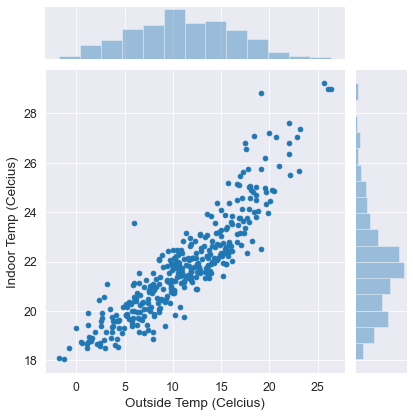

In [31]:

sns.jointplot(x='Outside Temp (Celcius)',y='Indoor Temp (Celcius)', data=Big_Weather) 

In [32]:
# sns.lmplot(x="DateTime", y="Outside Temp (Celcius)", hue='Season', data=Big_Weather)

### Rainfall Monthly

In [33]:
Rainfall_df_mon = Rainfall_df.groupby(['Month']).agg([np.mean, np.std])
Rainfall_df_mon

mm          
             mean       std
Month                      
2016-10  1.100000  2.319287
2016-11  3.020000  5.784188
2016-12  0.941379  3.368819
2017-01  1.158065  2.531768
2017-02  1.164286  1.755249
2017-03  1.020000  1.739282
2017-04  0.243333  0.705976
2017-05  1.406667  3.556726
2017-06  1.506667  3.085889
2017-07  3.093548  5.173260
2017-08  1.722727  2.907123
2017-09  2.386667  2.772492
2017-10  0.477778  0.790218

In [34]:
# sns.boxplot(x="Month", y="mm", data=Rainfall_df_mon, palette="Set3")

## Seasonal Data

### Barometer Seasonal

In [35]:
baro_df_season = Baro_df.groupby(['Season']).mean()
baro_df_season['std'] = Baro_df.groupby(['Season']).std()
baro_df_season

,Baro,std
Season,,
Autumn,1.008953,0.010281
Spring,1.010232,0.009796
Summer,1.007134,0.006149
Winter,1.013513,0.011303


### Indoor Temp Seasonal

In [36]:
indoor_temp_season = Indoor_Temp_df.groupby(['Season']).mean()
indoor_temp_season_std = Indoor_Temp_df.groupby(['Season']).std()
indoor_temp_season

,Humidity,Temperature,Temperature_range (low),Temperature_range (high)
Season,,,,
Autumn,52.021739,21.187514,20.057609,22.619565
Spring,45.021978,22.155824,20.860440,23.792308
Summer,53.548780,24.342927,23.518293,25.412195
Winter,43.842697,19.837303,18.030337,22.483146


In [37]:
indoor_temp_season_std

,Humidity,Temperature,Temperature_range (low),Temperature_range (high)
Season,,,,
Autumn,3.501894,1.006783,1.435594,0.643520
Spring,2.796736,1.297910,1.511502,1.061051
Summer,2.597018,1.782268,1.644154,2.040479
Winter,3.154718,0.926447,1.124460,0.923953


### Outdoor Temp Season

In [38]:
Outside_temp_season = Outside_Temp_df.groupby(['Season']).mean()
Outside_temp_season_std = Outside_Temp_df.groupby(['Season']).std()
Outside_temp_season

,Temperature,Temperature_range (low),Temperature_range (high)
Season,,,
Autumn,10.515231,7.702174,14.185870
Spring,11.309011,7.359341,16.807692
Summer,17.557831,13.543373,23.506024
Winter,5.623371,3.257303,8.151685


In [39]:
Outside_temp_season_std

,Temperature,Temperature_range (low),Temperature_range (high)
Season,,,
Autumn,3.918078,3.970882,4.754283
Spring,3.337653,3.218902,4.952446
Summer,2.883570,2.049640,4.976539
Winter,3.205753,3.572651,2.980890


### Rainfall Season

In [40]:
Rainfall_season = Rainfall_df.groupby(['Season']).mean()
Rainfall_season['std'] = Rainfall_df.groupby(['Season']).std()
Rainfall_season

,mm,std
Season,,
Autumn,2.084783,3.909721
Spring,0.890000,2.346647
Summer,2.156627,3.982498
Winter,1.088636,2.613380


## Merging my dataframes for the monthly and seasonal data

In [41]:
# Monthly_pd = pd.merge(baro_df_mon,indoor_temp_mon, on='Month')
# Monthly_pd
# Monthly_pd2 = pd.merge(Rainfall_df_mon,Outside_temp_mon, on='Month')
# Monthly = pd.merge(Monthly_pd, Monthly_pd2, on='Month')
# # df.drop(['B', 'C'], axis=1)
# Monthly.drop(['std_x'], axis=1)
# # Monthly.rename(columns = {"copies": "copies sold"})

# Monthly


# Baro_vs_humidity_vs_Rainfall1 = pd.merge(baro_df_mon,Rainfall_df_mon, on='Month')
# Baro_vs_humidity_vs_Rainfall = pd.merge(Baro_vs_humidity_vs_Rainfall1, indoor_temp_mon['Humidity'], on='Month')
# Baro_vs_humidity_vs_Rainfall = Baro_vs_humidity_vs_Rainfall.drop(['std_x','std_y'], axis=1)
# Baro_vs_humidity_vs_Rainfall.rename(columns={'mm':'Rainfall(mm)'})
# # sns.pairplot(Baro_vs_humidity_vs_Rainfall)
# BHR_corr = Baro_vs_humidity_vs_Rainfall.corr()


# fig
# sns.heatmap(BHR_corr, annot=True, cmap='BuPu')

In [42]:
'''Monthly data'''
Monthly_pd = pd.merge(baro_df_mon,indoor_temp_mon, on='Month')
Monthly_pd2 = pd.merge(Rainfall_df_mon,Outside_temp_mon, on='Month')
Monthly = pd.merge(Monthly_pd, Monthly_pd2, on='Month')
Monthly = Monthly.drop(['std_x','std_y','Temperature_range (low)_x','Temperature_range (high)_x','Temperature_range (low)_y','Temperature_range (high)_y'], axis=1)
Monthly



Monthly = Monthly.rename(columns = {'Temperature_x' : 'Indoor Temp'})
Monthly = Monthly.rename(columns = {'Temperature_y' : 'Outside Temp'})
Monthly = Monthly.rename(columns = {'mm' : 'Rainfal(mm)'})


plt.figure(figsize=(10,8))

M_c = Monthly.corr()
sns.heatmap(M_c,annot=True, cmap='RdBu')

KeyError: 'std_x'

In [ ]:
Monthly['Baro'].max()


Monthly

In [ ]:
Temperature = pd.merge(Outside_temp_season,indoor_temp_season, on='Season')
Temperature = Temperature.drop(['Temperature_range (low)_x','Temperature_range (high)_x', 'Humidity', 'Temperature_range (low)_y', 'Temperature_range (high)_y'],axis=1)
Temperature



# Big_Weather = Big_Weather.drop(['Month_y_x','Season_y_x','Month_x_y','Season_x_y','Month_y_y','Season_y_y'],axis=1)

# Big_Weather1 = pd.merge(Rainfall_df,Outside_Temp_df, on='DateTime')
# Big_Weather2 = pd.merge(Baro_df,Indoor_Temp_df, on='DateTime')
# Big_Weather = pd.merge(Big_Weather2,Big_Weather1, on='DateTime')

sns.boxplot(Temperature)

In [ ]:
Temperature